<a href="https://colab.research.google.com/github/LennRBriones/neural-networks-practices/blob/main/first_neural_network_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural Network example

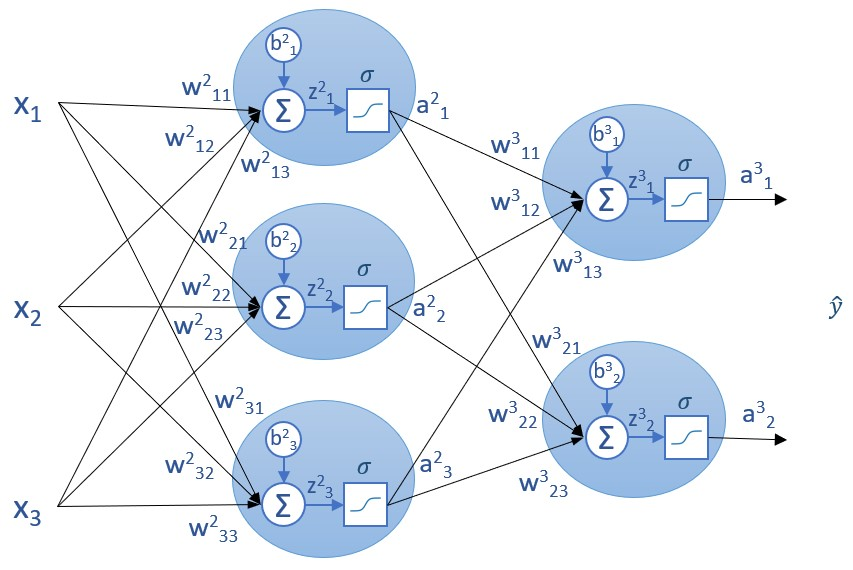

## libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

In [7]:
N = 1000 #Setting how many examples we need
gaussian_quantiles= make_gaussian_quantiles(mean=None,
                        cov=0.1, #data distribution
                        n_samples = N, 
                        n_features = 2, #two dimensions for our data
                        n_classes = 2, # two classes to solve it
                        shuffle = True ,
                        random_state=None
                        )

X, Y = gaussian_quantiles

In [8]:
X.shape ## 1000 examples with 2 features

(1000, 2)

In [10]:
Y.shape ## 1000 examples, but as vector we need to change it

(1000,)

In [11]:
Y = Y[:, np.newaxis]

## Graph

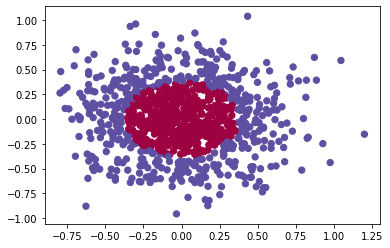

In [13]:
plt.scatter(X[:,0], X[:,1], c=Y[:,0], s=40, cmap=plt.cm.Spectral )

## Activation Functions

In [14]:
def sigmoid(x, derivate = False):
  if derivate:
      return np.exp(-x)/(( np.exp(-x) +1)**2)
  else:
      return 1 / (1 + np.exp(-x))

def relu(x, derivate = False):
    if derivate:
       x[x<=0] = 0
       x[x>0] = 1
       return x
    else:
      return np.maximun(0,x)


## Loss Function

In [15]:
def mse(y,y_hat,derivate=False):
  if derivate:
      return (y_hat - y)
  else:
      return np.mean((y_hat - y)**2)

In [19]:
def initialize_parameters_deep(layers_dim):
    parameters = {}
    L = len(layers_dim)
    for l in range(0,L-1):
      parameters["W"+str(l+1)] = np.random.rand(layers_dim[l], layers_dim[l+1]) *2 -1
      parameters["B"+str(l+1)] = np.random.rand(1, layers_dim[l+1]) *2 -1
    return parameters


In [21]:
layer_dims = [2,4,8,1]
params = initialize_parameters_deep(layer_dims)

In [22]:
params

{'W1': array([[-0.36010004, -0.29893579, -0.41314104, -0.06525162],
        [-0.874834  , -0.70581864,  0.22312855,  0.4036001 ]]),
 'B1': array([[ 0.98668371, -0.39326798,  0.55540079, -0.51379489]]),
 'W2': array([[ 0.03552008,  0.81697626,  0.43771199, -0.96974465,  0.1017164 ,
         -0.63135278,  0.71501495,  0.55251645],
        [ 0.85014338,  0.51267665,  0.07051977, -0.63553143,  0.7640435 ,
         -0.90407388, -0.54738958, -0.46313058],
        [-0.11111707, -0.37241269, -0.74250211,  0.11312983, -0.80156934,
          0.12063121, -0.86620556,  0.10702141],
        [ 0.69647654, -0.45577816,  0.7172515 , -0.49758825, -0.74132333,
         -0.40833617,  0.22559221, -0.62434129]]),
 'B2': array([[ 0.46973283,  0.18562357,  0.27708201, -0.66129308,  0.81043288,
         -0.26476095,  0.53020237,  0.34367342]]),
 'W3': array([[ 0.65134933],
        [-0.01328766],
        [ 0.08678221],
        [-0.69142909],
        [ 0.9198344 ],
        [-0.59662944],
        [-0.830846  ],
